In [1]:
import f3dasm

2022-12-07 16:13:00.863917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-07 16:13:01.005650: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-07 16:13:01.654197: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:/usr/local/cuda-11.1/lib64
2022-12-07 16:13:01.654264: W ten

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21)  [GCC 9.4.0]
executable: /home/martin/miniconda3/envs/f3dasm_env2/bin/python
   machine: Linux-5.14.0-1054-oem-x86_64-with-debian-bullseye-sid

Python dependencies:
          pip: 22.3.1
   setuptools: 65.5.1
      sklearn: 1.0.2
        numpy: 1.21.6
        scipy: 1.7.3
       Cython: 0.29.32
       pandas: 1.3.5
   matplotlib: 3.5.3
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True


In [3]:
seed = 54
dimensionality = 1
N = 100
design = f3dasm.make_nd_continuous_design(bounds=np.tile([0.,1.], (dimensionality, 1)),dimensionality=dimensionality)

In [4]:
sampler = f3dasm.sampling.LatinHypercube(design=design, seed=seed)
samples = sampler.get_samples(numsamples=N)
f = f3dasm.functions.Levy(dimensionality=dimensionality, seed=seed)

samples.add_output(f(samples.get_input_data().to_numpy()))

In [5]:
reg = MLPRegressor(max_iter=1000)
reg.fit(*samples.to_numpy())

MLPRegressor(max_iter=1000)

In [6]:
X_pred = np.linspace(0.,1.,100).reshape(-1,1)

y_pred = reg.predict(X_pred)
y_pred

array([1.9322288 , 1.94706612, 1.96320758, 1.97969375, 1.99617992,
       2.01266609, 2.02940905, 2.04809637, 2.0667837 , 2.08547102,
       2.10415835, 2.12284568, 2.141533  , 2.16022033, 2.17890766,
       2.19759498, 2.21628231, 2.23496963, 2.25365696, 2.27234429,
       2.29103161, 2.30971894, 2.32840627, 2.34709359, 2.36578092,
       2.38446824, 2.40315557, 2.4218429 , 2.44053022, 2.45921755,
       2.47790488, 2.4965922 , 2.51527953, 2.53396686, 2.55265418,
       2.57134151, 2.59002883, 2.60871616, 2.62740349, 2.64609081,
       2.66477814, 2.68346547, 2.70215279, 2.72332217, 2.74485451,
       2.76641256, 2.81572464, 2.90580664, 3.00132327, 3.09683991,
       3.19235654, 3.28787317, 3.38338981, 3.47890644, 3.57442307,
       3.6699397 , 3.76545634, 3.86097297, 3.9564896 , 4.05200624,
       4.14752287, 4.2430395 , 4.33855613, 4.43407277, 4.5295894 ,
       4.62510603, 4.72062267, 4.8161393 , 4.91165593, 5.00717256,
       5.1026892 , 5.19820583, 5.29372246, 5.3892391 , 5.48475

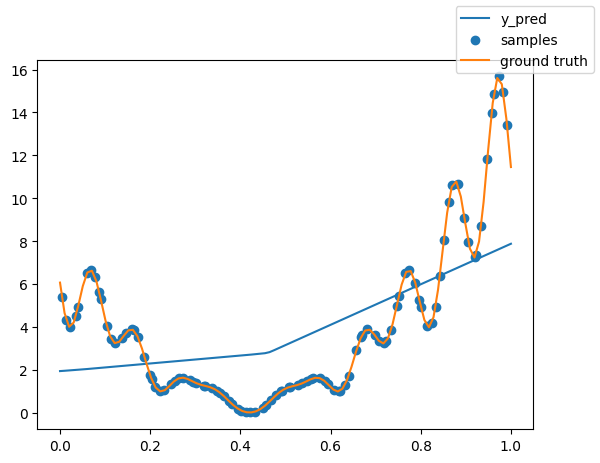

In [7]:
fig, ax = plt.figure(), plt.axes()

ax.plot(X_pred, y_pred, label='y_pred')
ax.scatter(*samples.to_numpy(), label='samples')
ax.plot(np.linspace(0.,1.,100).reshape(-1,1), f(np.linspace(0.,1.,100).reshape(-1,1)), label='ground truth')
ax.plot()
fig.legend()

In [8]:
f(np.linspace(0.,1.,10))

array([[125.65288526]])

In [9]:
f(np.linspace(0.,1.,10).reshape(-1,1))

array([[ 6.06014986],
       [ 3.55674794],
       [ 0.98475271],
       [ 1.17690056],
       [ 0.1600715 ],
       [ 1.54792645],
       [ 3.46412952],
       [ 6.59696602],
       [10.0733018 ],
       [11.45166409]])